# Imports

In [3]:
# misc
import sys
import os

# load/save files
import zipfile
import json

# plot
import matplotlib.pyplot as plt
from PIL import Image

# datascience libs
import numpy as np
import pandas as pd

try: # python
    path_ = os.path.join(os.path.dirname(os.path.abspath(__file__)), "..")
except NameError: # jupyter notebook
    path_ = os.path.dirname(os.getcwd())

dataset_dir = os.path.join(path_, "datasets")
model_dir = os.path.join(path_, "models")


# Load exemple

(28, 28, 1)


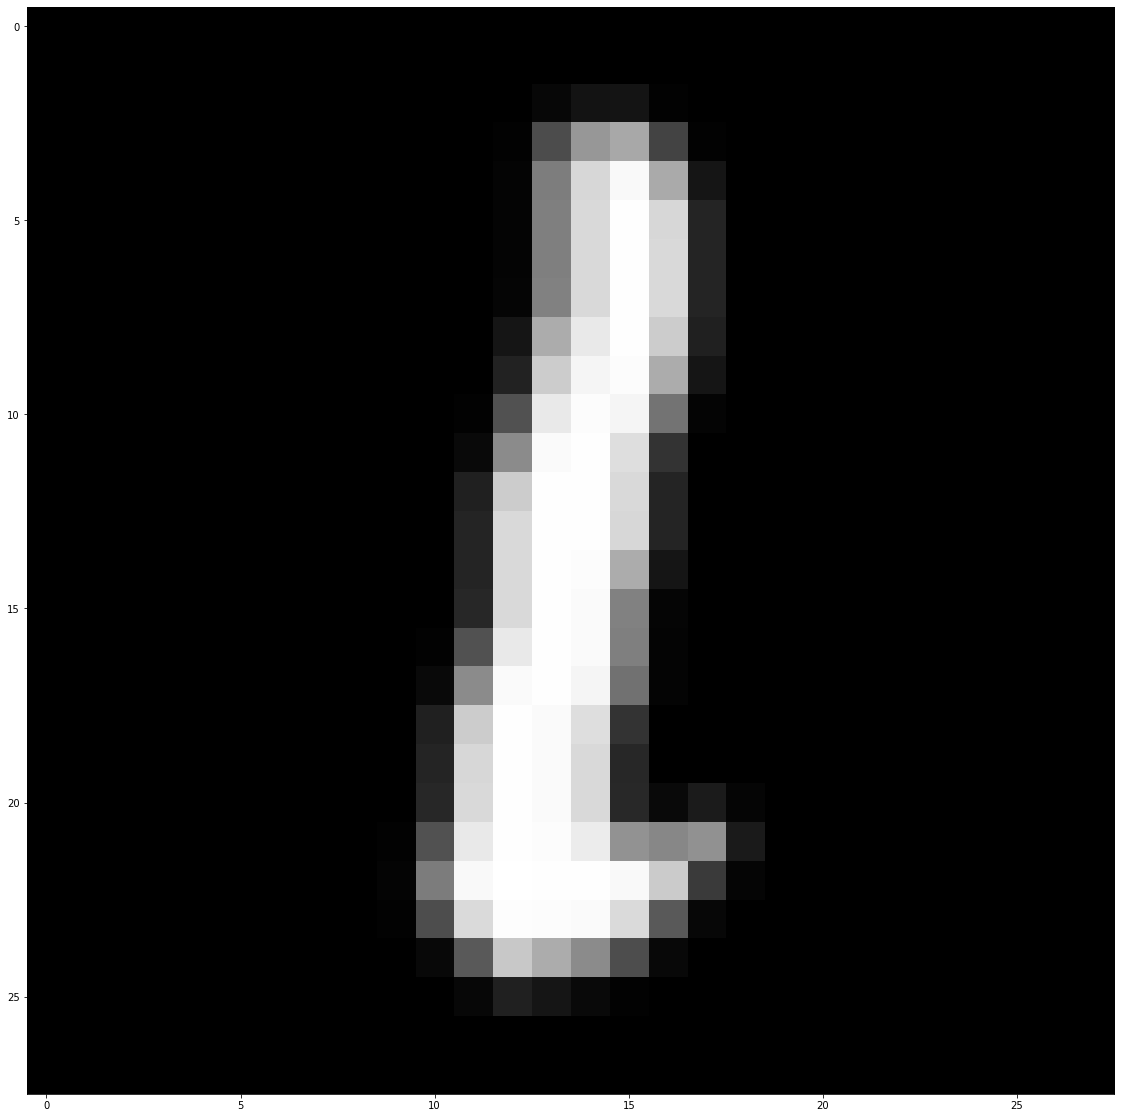

(28, 28, 1)


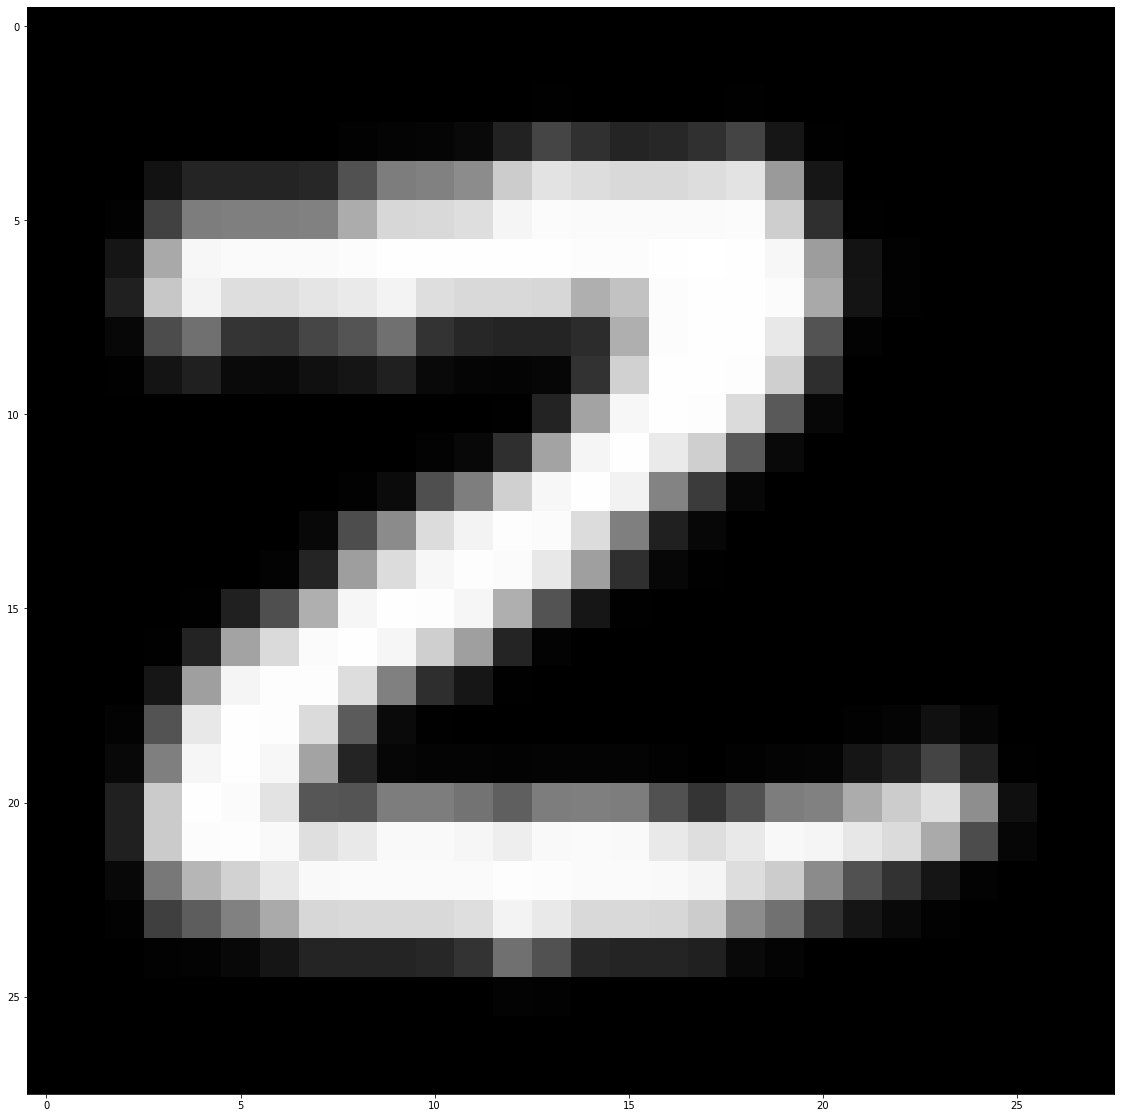

(28, 28, 1)


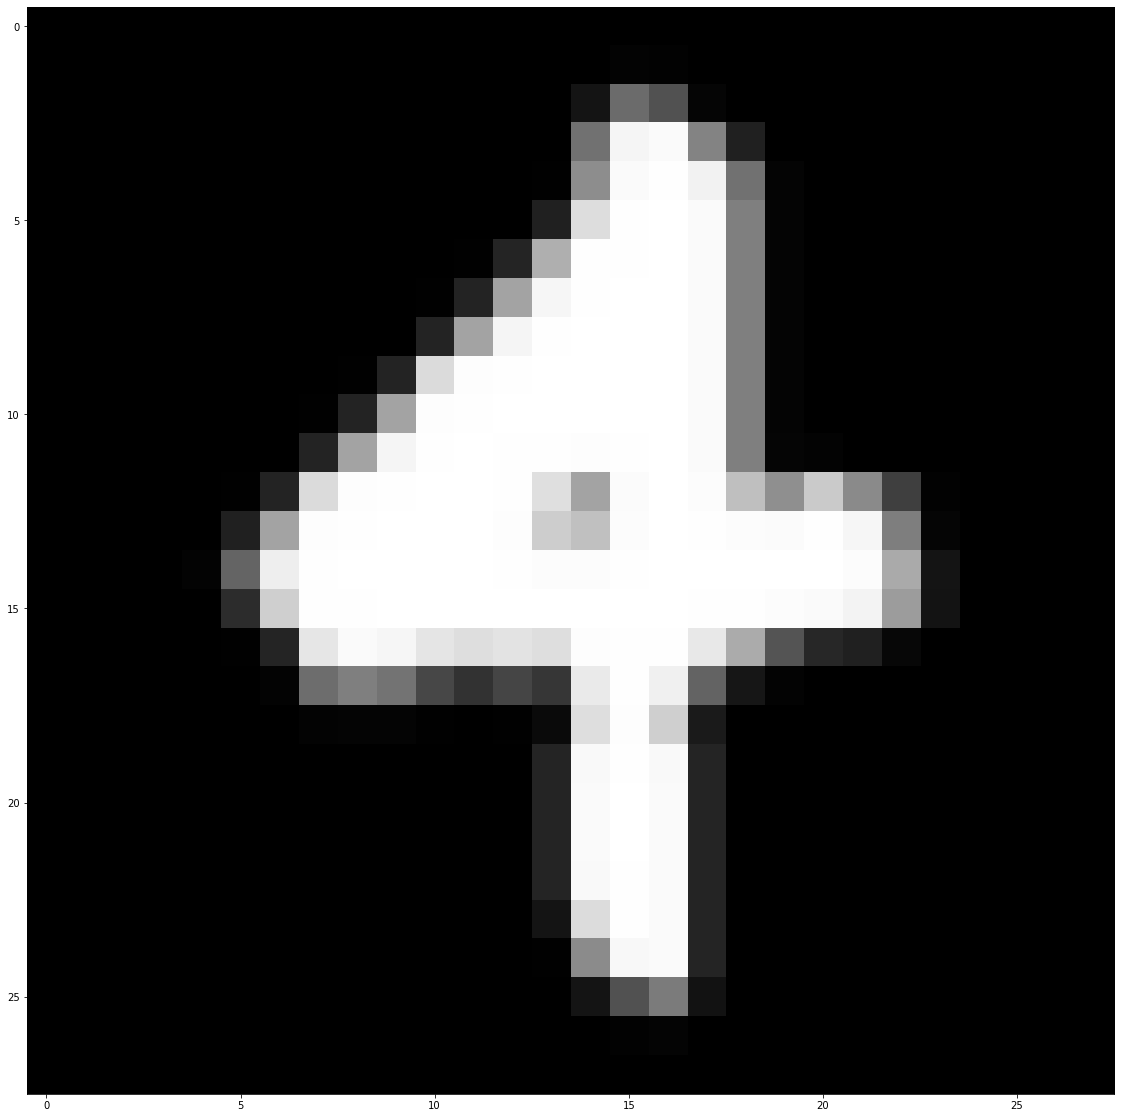

In [4]:
try:
    from types import SimpleNamespace as Namespace
except ImportError:
    from argparse import Namespace

# https://towardsdatascience.com/efficiently-splitting-an-image-into-tiles-in-python-using-numpy-d1bf0dd7b6f7
def reshape_split(image:np.ndarray, kernel_size:tuple):
    img_height, img_width, channels = image.shape
    tile_height, tile_width = kernel_size
    tiled_array = image.reshape(img_height // tile_height,
                                tile_height,
                                img_width // tile_width,
                                tile_width,
                                channels)
    return tiled_array.swapaxes(1,2)
    

#(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data(path="mnist.npz")
def load_data(dir_path):
    test_path = os.path.join(dir_path, "test.json")
    #train_path = os.path.join(dir_path, "train.json")
    with open(test_path, 'r', encoding='utf-8') as f:
        obj = json.loads(f.read(), object_hook = lambda d: Namespace(**d))
    for s in obj.files:
        #print(os.path.basename(s))
        img_path = os.path.join(dir_path, os.path.basename(s))
        img = Image.open(img_path).convert('L')
        data = np.array(img, dtype=np.uint8)
        data = np.expand_dims(data, axis=-1)
        
        #print(img.format)
        #print(img.size)
        #print(img.mode)
        #print(np.expand_dims(data, axis=-1).shape)
        #print("")
        
        data = reshape_split(data, (28,28))[0][0]
        print(data.shape)
        plt.figure(figsize = (20,20))
        plt.imshow(data, cmap='gray')
        plt.show()
        #break # only the first one
        
load_data(os.path.join(dataset_dir, "origin-emnist-mnist"))